In [5]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars.csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 14049
                    user_id              username  \
0  UCB2viBYILPnPwcwag_t6w1A        @darshan.v6518   
1  UCMjkgiYITD40xPOWmIAGoIA    @aventurascomtadeu   
2  UC-t4qjuBmo2FZCN5WCrWA_w             @Angie_VR   
3  UCnE46tbLU8fVOSl7WVIdEqg  @RamonValenzuela-t8q   
4  UCPAd1aRHoF4V6so1HnVMaHA               @탕이-g1e   

                                      comment  likes  replies  \
0                   Anyone from January 2028?      0        0   
1                               Música legal       1        0   
2  Quien mas vino después del estreno de APT?      1        0   
3                                     Meeeee❤      1        0   
4                                 Anyone 2024      0        0   

                   date                                              video  \
0  2024-10-20T16:24:17Z  Mark Ronson - Uptown Funk (Official Video) ft....   
1  2024-10-20T16:00:02Z  Mark Ronson - Uptown Funk (Official Video) ft....

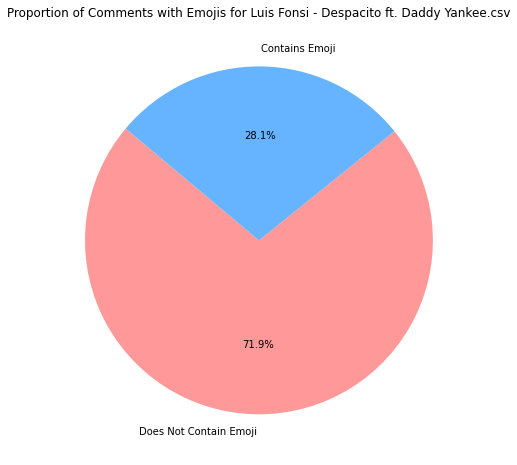

In [6]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [7]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-7-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
3,UCnE46tbLU8fVOSl7WVIdEqg,@RamonValenzuela-t8q,Meeeee❤,1,0,2024-10-20T15:28:36Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
6,UCKqayujMnULKBF1i2y6de_g,@anaclaudialima8522,Música mais engraçada do mundo parabéns🎉,0,0,2024-10-20T14:54:13Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
7,UCsA2YQpbvg5wQzJ9rdt-WSQ,@Star-s9l7e,0:17ชอบท่อนนี้ 💓,1,0,2024-10-20T14:25:03Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
8,UCJnbHLm3ub0t9h6puJNvYVg,@chloest6418,❤fggttrtytyyyyyyyyutyuuttgghhhuuguggghuguiijju...,0,0,2024-10-20T14:24:20Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
9,UC9jNy7aYlJqRJ2vG38PGe2w,@haianhvu9320,Who is this after APT?😂😂,4,1,2024-10-20T14:18:21Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
...,...,...,...,...,...,...,...,...,...
49973,UCMUYD-rX_oZ5kTBZ6goe0TQ,@llj4142,Malayalis undo ❤😁,1,0,2021-09-18T03:48:01Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
49976,UC5EvuAjhb4UMWdDXJq7LD7A,@mocchan06,まじこの曲好き！！共感できる人いない？？,1,0,2021-09-18T02:59:24Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
49978,UCzHitF_2pChTgdI5flkArTg,@moustafabenois6444,Septembre 2021😍😍,1,0,2021-09-18T02:22:33Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,1
49986,UCLZNudAQfk4WSTSSop9gHFA,@elisraxd6944,🖖 👍,0,0,2021-09-18T01:36:43Z,Mark Ronson - Uptown Funk (Official Video) ft....,True,2


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars.csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 4: Detected language: nl
Row 4: Original: Meeeee❤, Translated: Meeee ❤
Row 4 saved.
Row 7: Detected language: pt
Row 7: Original: Música mais engraçada do mundo parabéns🎉, Translated: Funniest song in the world congratulations 🎉
Row 7 saved.
Row 8: Detected language: th
Row 8: Original: 0:17ชอบท่อนนี้ 💓, Translated: 0:17 I like this part. 💓
Row 8 saved.
Row 9: Detected language: fi
Row 9: Original: ❤fggttrtytyyyyyyyyutyuuttgghhhuuguggghuguiijjuiuuuuuc. Vhgghhhhih
Gggtyuyuiiuiuuuuu u, Translated: fggttrtytyyyyyyyutyuuttgghhhhuuguggghuguiijjuiuuuuuc. Vhgghhhhih
Gggtyuyuiiuuuuuu u ❤
Row 9 saved.
Row 10: Detected language: en
Row 10: Original: Who is this after APT?😂😂, Translated: Who is this after APT? 😂😂
Row 10 saved.
Row 12: Detected language: en
Row 12: Original: Hay here🎉, Translated: Hay here 🎉
Row 12 saved.
Row 14: Detected language: fr
Row 14: Original: LOVEYO❤, Translated: LOVEYO ❤
Row 14 saved.
Row 18: Detected language: en
Row 18: Original: Who is watching at 2024😂, Translat

Row 152: Original: 丼20杯って言ってるようにしか聞こえんw, Translated: 20w 丼杯って言ってるようにしか聞こえん
Row 152 saved.
Row 153: Detected language: en
Row 153: Original: I can't believe the dance moves of this. They would ordinarily look awkward, but how did they make it look so cool? 😄, Translated: I can't believe the dance moves of this. They would ordinarily look awkward, but how did they make it look so cool? 😄
Row 153 saved.
Row 154: Text contains only emojis or is empty: 😅
Row 154 saved.
Row 155: Detected language: en
Row 155: Original: Who's still listening to this❤, Translated: Who's still listening to this ❤
Row 155 saved.
Row 157: Detected language: en
Row 157: Original: Anyone from INDIA 🇮🇳  ?, Translated: Anyone from INDIA   ? 🇮🇳
Row 157 saved.
Row 162: Detected language: en
Row 162: Original: WoW❤❤   what  the  okay. Good, Translated: WoW   what  the  okay. Good ❤❤
Row 162 saved.
Row 165: Error translating text: 2024🎉, Error: No features in text.
Row 165 saved.
Row 169: Detected language: en
Row 169: O

Row 272: Original: nostolgiacccccc asffffffffffffffff. technically 10 11 years ago damnnnnn toooooo crazyyyyyy. Nostolgiaccccccccccccccc🥺🥺🥺🥺🥺🥺🥺🥺🔥🔥🔥☦️, Translated: nostalgiacccccc asffffffffffffffff. technically 10 11 years ago damnnnnn toooooo crazyyyyyy. Nostalgiaccccccccccccccc🥺🥺🥺🥺🥺🥺🥺🥺 🔥🔥🔥☦️
Row 272 saved.
Row 274: Detected language: en
Row 274: Original: Someone tells me 😢 where is Bruno Mars these days 😢. From which country he belongs ???? I love him so much 🥰💕💕💕💕. God bless you Bruno Mars where ever you are 🙏🥰💕💕💕💕💕, Translated: Someone tells me  where is Bruno Mars these days . From which country he belongs ???? I love him so much 🥰. God bless you Bruno Mars where ever you are 🥰 😢😢💕💕💕💕🙏💕💕💕💕💕
Row 274 saved.
Row 276: Text contains only emojis or is empty: 아래 깔리는 리듬이 매력적이다
Row 276 saved.
Row 277: Detected language: en
Row 277: Original: My mum's literally cleaning to this playlist its that good 😂😂, Translated: My mum's literally cleaning to this playlist its that good 😂😂
Row 277 save

Row 322: Original: 5billions views😭🙏, Translated: 5billions views 😭🙏
Row 322 saved.
Row 326: Detected language: en
Row 326: Original: He still does it ALL in 2024!❤, Translated: He still does it ALL in 2024! ❤
Row 326 saved.
Row 327: Detected language: sl
Row 327: Original: I love it ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️, Translated: I love it ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️
Row 327 saved.
Row 330: Text contains only emojis or is empty: 😊
Row 330 saved.
Row 334: Text contains only emojis or is empty: 日本人いますかー？
Row 334 saved.
Row 341: Detected language: hu
Row 341: Original: O‘ZBEKISTAN 🇺🇿  olg‘a 2024, Translated: UZBEKISTAN election year 2024 🇺🇿
Row 341 saved.
Row 342: Detected language: en
Row 342: Original: i was all happy with this song and then saw the date that it was released 😥, Translated: i was all happy with this song and then saw the date that it was released 😥
Row 342 saved.
Row 343: Error translating text: 14-10-2024 🏌‍♂🏌‍♂🏌‍♂🏌‍♂🏌‍♂🏌‍♂, Error: No features in tex

Row 448: Original: Vim conferir o clipe por causa de Leozito. 💁🏽‍♀️, Translated: I came to check out the clip because of Leozito. 💁🏽♀️
Row 448 saved.
Row 449: Detected language: ru
Row 449: Original: 2024 октябрь 12 👍👍, Translated: October 12, 2024 👍👍
Row 449 saved.
Row 451: Detected language: en
Row 451: Original: who in the spooky month? 🎃👇, Translated: who in the spooky month? 🎃👇
Row 451 saved.
Row 452: Error translating text: 🤟😎👍, Error: No features in text.
Row 452 saved.
Row 458: Detected language: en
Row 458: Original: Oh my God! I can't believe it, I'm going to sing this song with him ❤, Translated: Oh my God! I can't believe it, I'm going to sing this song with him ❤
Row 458 saved.
Row 459: Detected language: pl
Row 459: Original: Uwielbiam❤❤❤ ta marynarka robi robotę 🔥, Translated: I love this jacket it does the job ❤❤❤🔥
Row 459 saved.
Row 460: Detected language: es
Row 460: Original: Esta cansion due de mi graduación ❤❤, Translated: This song is about my graduation ❤❤
Row 46

Row 578: Original: 2024 anyone? 🙋🏽‍♂️, Translated: 2024 anyone? ‍ 🙋🏽♂️
Row 578 saved.
Row 580: Detected language: en
Row 580: Original: anybody just randomly watching 2010 hits?😁, Translated: anybody just randomly watching 2010 hits? 😁
Row 580 saved.
Row 583: Detected language: en
Row 583: Original: I said up down up down funk up😍🕴️🕺, Translated: I said up down up down funk up 😍🕴️🕺
Row 583 saved.
Row 591: Error translating text: 2:08  😊😊😊😊😊😊😊😊, Error: No features in text.
Row 591 saved.
Row 592: Detected language: en
Row 592: Original: October 2024 anyone here 
👇, Translated: October 2024 anyone here 👇
Row 592 saved.
Row 594: Text contains only emojis or is empty: ❤🎉❤🎉❤😊
Row 594 saved.
Row 595: Text contains only emojis or is empty: ❤🎉❤🎉❤
Row 595 saved.
Row 596: Text contains only emojis or is empty: 😅
Row 596 saved.
Row 599: Detected language: so
Row 599: Original: 😂😊hahahahaha, Translated: hahahahaha 😂😊
Row 599 saved.
Row 601: Detected language: en
Row 601: Original: 2024 gang gather

Row 705: Original: 2024 sábado 5 de octubre ❤, Translated: 2024 Saturday October 5 ❤
Row 705 saved.
Row 712: Detected language: en
Row 712: Original: Anyone October 2024😊?, Translated: Anyone October 2024? 😊
Row 712 saved.
Row 716: Text contains only emojis or is empty: ❤❤❤❤❤❤❤
Row 716 saved.
Row 717: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 717 saved.
Row 719: Detected language: en
Row 719: Original: STILL V-HOT IN OCTOBER-2024 right-NOW ❤❤❤❤❤❤❤, Translated: STILL V-HOT IN OCTOBER-2024 right-NOW ❤❤❤❤❤❤❤
Row 719 saved.
Row 724: Detected language: cy
Row 724: Original: Ud8f8r8❤❤❤❤❤😂😂😂😂😂😂❤❤❤❤❤😂😂😂😂😂😮😮😅😊😊😊ha 😮es 😮🎉😢🎉😅😂😅🎉😮❤❤❤ur8r8t, Translated: Ud8f8r8ha is ur8r8t ❤❤❤❤❤😂😂😂😂😂😂❤❤❤❤❤😂😂😂😂😂😮😮😅😊😊😊😮😮🎉😢🎉😅😂😅🎉😮❤❤❤
Row 724 saved.
Row 725: Detected language: ro
Row 725: Original: Udie5e86rut7🎉🎉🎉🎉uiro6r, Translated: Udie5e86rut7uiro6r 🎉🎉🎉🎉
Row 725 saved.
Row 732: Detected language: id
Row 732: Original: assalamu'alaikum wrb salam kenal RIVALDO SELIAN Aceh Tenggara Kutacane semoga kk, Mark Ronso

Row 882: Original: 🇨🇳❤️‍🔥🌟👑🔌🔋🇬🇧🇨🇳🌟🌟🩶🖤👹😘🤪 Hello 👋🏽 Dee save 🔖 💾  A Lot missing work 💼 🏢, Translated: ‍🩶🤪 Hello  Dee save    A Lot missing work 🇨🇳❤️🔥🌟👑🔌🔋🇬🇧🇨🇳🌟🌟🖤👹😘👋🏽🔖💾💼🏢
Row 882 saved.
Row 887: Detected language: pt
Row 887: Original: Quem vai no show em são Paulo esee ano ❤❤, Translated: Who's going to the show in São Paulo this year? ❤❤
Row 887 saved.
Row 891: Text contains only emojis or is empty: カッコよく踊れる人ばっか😆💕
Row 891 saved.
Row 894: Detected language: en
Row 894: Original: ❤️‍🔥❤️‍🔥❤️‍🔥this song livin' in my heart for a long time, Translated: ‍‍‍this song livin' in my heart for a long time ❤️🔥❤️🔥❤️🔥
Row 894 saved.
Row 895: Detected language: en
Row 895: Original: Anyone here in 2024❤, Translated: Anyone here in 2024 ❤
Row 895 saved.
Row 897: Detected language: en
Row 897: Original: Will anyone listen to this beautiful music in 2024❤?, Translated: Will anyone listen to this beautiful music in 2024? ❤
Row 897 saved.
Row 899: Detected language: en
Row 899: Original: 534 Crore 🎉, Transla

Row 1030: Original: Syper❤🎉, Translated: Syper ❤🎉
Row 1030 saved.
Row 1031: Text contains only emojis or is empty: ❤
Row 1031 saved.
Row 1032: Detected language: en
Row 1032: Original: Sonic 😅 dance better 🎉❤, Translated: Sonic  dance better 😅🎉❤
Row 1032 saved.
Row 1033: Detected language: en
Row 1033: Original: I love you so much my brother ❤, Translated: I love you so much my brother ❤
Row 1033 saved.
Row 1036: Detected language: en
Row 1036: Original: Did I hear Hallelujah, wow, the devil is brave,  using the word hallelujah in such demonic music!  Lord have mercy on this generation.  Father, forgive them (us),  for they know not what they do 😢, Translated: Did I hear Hallelujah, wow, the devil is brave,  using the word hallelujah in such demonic music!  Lord have mercy on this generation.  Father, forgive them (us),  for they know not what they do 😢
Row 1036 saved.
Row 1041: Detected language: ru
Row 1041: Original: Качает❤❤, Translated: It's pumping ❤❤
Row 1041 saved.
Row 1042: Te

Row 1224: Original: 2024 Tajikistan 🇹🇯❤, Translated: 2024 Tajikistan 🇹🇯❤
Row 1224 saved.
Row 1225: Detected language: en
Row 1225: Original: 3/4 of Earth's population have watched this song lol🎃, Translated: 3/4 of Earth's population have watched this song lol 🎃
Row 1225 saved.
Row 1226: Detected language: fr
Row 1226: Original: qui peut résister à ça !!!!!!!!!!!!!😍😍😍😍😍😍😍😍😍😍Yeahhhhh, Translated: who can resist this!!!!!!!!!!!!Yeahhhhh 😍😍😍😍😍😍😍😍😍😍
Row 1226 saved.
Row 1228: Detected language: en
Row 1228: Original: 😊 I'm the one who's watching it and you have to wash it, Translated: I'm the one who's watching it and you have to wash it 😊
Row 1228 saved.
Row 1230: Detected language: en
Row 1230: Original: Chipmunks !!!!😭😭😭, Translated: Chipmunks !!!! 😭😭😭
Row 1230 saved.
Row 1234: Detected language: sw
Row 1234: Original: Uio😢🎉😮, Translated: Uio 😢🎉😮
Row 1234 saved.
Row 1240: Detected language: en
Row 1240: Original: MJ's thriller - uptown funk could be the coolest transition 💯, Translated: 

Row 1394: Original: Está canción me pone de buen humor y me dan muchas ganas de bailar 🪩💃🏻🎶, Translated: This song puts me in a good mood and makes me want to dance 🪩 💃🏻🎶
Row 1394 saved.
Row 1400: Detected language: en
Row 1400: Original: Ppl who came here because of sonic the hedgehog 2 Siberia seen
👇, Translated: Ppl who came here because of sonic the hedgehog 2 Siberia seen 👇
Row 1400 saved.
Row 1402: Text contains only emojis or is empty: 😂😂
Row 1402 saved.
Row 1409: Detected language: en
Row 1409: Original: Bruno's beat has rhythm ❤❤❤, Translated: Bruno's beat has rhythm ❤❤❤
Row 1409 saved.
Row 1411: Detected language: en
Row 1411: Original: Wow  this song is awesome  Now I can dance to  this song ❤❤❤❤this song, Translated: Wow  this song is awesome  Now I can dance to  this song this song ❤❤❤❤
Row 1411 saved.
Row 1412: Detected language: en
Row 1412: Original: the way Bruno mars is dancing with pride and joy with the afro American community gives me the legend Rudy ray moore dole

Row 1551: Original: Aki alguien de 2024 ?😊, Translated: Anyone here from 2024? 😊
Row 1551 saved.
Row 1553: Text contains only emojis or is empty: 🔥🔥🔥🔥🔥🔥🔥💯
Row 1553 saved.
Row 1558: Detected language: en
Row 1558: Original: Can't believe it's been almost 10 years!!🔥, Translated: Can't believe it's been almost 10 years!! 🔥
Row 1558 saved.
Row 1563: Text contains only emojis or is empty: すみません日本語で。これの音楽をパクってゲームに出しているのがあります。名前をコマーシャルブレイクと言う名前になっていました
Row 1563 saved.
Row 1565: Detected language: en
Row 1565: Original: Just what I need before going shopping 😂, Translated: Just what I need before going shopping 😂
Row 1565 saved.
Row 1566: Detected language: en
Row 1566: Original: who loves Bruno Mars since a kid?🥰🥰😛🤩🤪, Translated: who loves Bruno Mars since a kid?🥰🥰🤩🤪 😛
Row 1566 saved.
Row 1568: Detected language: en
Row 1568: Original: Bruno Mars, why are you so hot and talented! I love your voice and stuff lol! Just wanted to say: you got that talent going in all the right directions and st

Row 1739: Original: So much nostalgia 😭, Translated: So much nostalgia 😭
Row 1739 saved.
Row 1740: Detected language: de
Row 1740: Original: PRAKTEK NARI ZAMAN SMP HEYYY 😆😆😍😍😍😍, Translated: DANCE PRACTICE IN JUNIOR HIGH SCHOOL HEYYY 😆😆😍😍😍😍
Row 1740 saved.
Row 1747: Detected language: en
Row 1747: Original: I can't believe how fast time passinh by I watch this when I was six snatching my mom's phone😂😂, Translated: I can't believe how fast time passinh by I watch this when I was six snatching my mom's phone 😂😂
Row 1747 saved.
Row 1749: Detected language: pt
Row 1749: Original: ❤ muito bom, Translated: very good ❤
Row 1749 saved.
Row 1755: Text contains only emojis or is empty: 💿💿💿
Row 1755 saved.
Row 1757: Text contains only emojis or is empty: はげ！
Row 1757 saved.
Row 1761: Detected language: en
Row 1761: Original: I was addicted to this song in 2017🔥🔥, Translated: I was addicted to this song in 2017 🔥🔥
Row 1761 saved.
Row 1762: Detected language: en
Row 1762: Original: When life hits di

Row 1913: Original: So happy  😊  my  no, Translated: So happy    my  no 😊
Row 1913 saved.
Row 1917: Text contains only emojis or is empty: ❤❤❤❤❤
Row 1917 saved.
Row 1919: Text contains only emojis or is empty: 昨天來台灣唱得很棒喔
Row 1919 saved.
Row 1921: Detected language: en
Row 1921: Original: Who also still likes this song in 2024?🔥, Translated: Who also still likes this song in 2024? 🔥
Row 1921 saved.
Row 1923: Detected language: en
Row 1923: Original: I miss when life was like this 😪, Translated: I miss when life was like this 😪
Row 1923 saved.
Row 1927: Detected language: af
Row 1927: Original: 5 billion views 😮, Translated: 5 billion views 😮
Row 1927 saved.
Row 1931: Detected language: cs
Row 1931: Original: Love you brunoo❤❤❤, Translated: Love you brunoo ❤❤❤
Row 1931 saved.
Row 1932: Detected language: vi
Row 1932: Original: Mono ơi là mono t xin m😢, Translated: Mono oh mono i beg you 😢
Row 1932 saved.
Row 1933: Detected language: en
Row 1933: Original: First football game of the seaso

Row 2037: Original: Like me pls plsplsplsplsplspslslspslslslslslslslslslslspslslspslslsspslsllpsplsplsplsplsplslslpslppsllpslpslpslpslpplsplsplslpslppsplpsplsplppplsplsplpsllsplsplslpsplsplspllpsplslpspslpslpslpplslpsplsplslpsplsllpslpspsplslpsplsplslplsplsplsplpsllpsplsplplsplsplsplsplsslslpspslpslslppplslsplslpsplsplsplspsslspsjohslhukwuih0’)skulhiu
Husk
Husk
Sliuhskulhihilslkuhnh,ykjjk
Kjfchsslfukwlerfhnhyjkcfqerliulrggukjseiyretsgyuivltrgshyciukteryucikertrhcytriukvhsyeturiuihvhyhowrryuhitcwuhyilwrctyiuhctbtikut robiugrtgghui trg😢😮😢o  o😢😢😂🎉😢🎉hyioucgrsthhcsgreyuiyhycurgseihgesruyihecrutiyhyuoitcrghyuictgoryunortegcihuiyotecrgoiuycghliyutreuirhtyycutgrihohyuit6krt37bw8vjykrjg, Translated: Like me pls plsplsplsplsplspslslspslslslslslslslslslslspslslspslslsspslsllpsplsplsplsplsplslslpslppsllpslpslpslpslpplsplsplslpslppsplpsplsplppplsplsplpsllsplsplslpsplsplspllpsplslpspslpslpslpplslpsplsplslpsplsllpslpspsplslpsplsplslplsplsplsplpsllpsplsplplsplsplsplsplsslslpspslpslslppplslsplslpsplspl

Row 2146: Original: Still 🔥🔥🔥🔥🔥💯, Translated: Still 🔥🔥🔥🔥🔥💯
Row 2146 saved.
Row 2149: Detected language: es
Row 2149: Original: Una disculpa por decir que es una porquería 😅, Translated: Sorry for saying it's crap 😅
Row 2149 saved.
Row 2151: Detected language: fi
Row 2151: Original: 💯 XD jajajaja y si ❤❤❤amoros6❤❤❤😂🎉😢😮😅😊, Translated: XD hahaha and yes amoros6 💯❤❤❤❤❤❤😂🎉😢😮😅😊
Row 2151 saved.
Row 2152: Detected language: fi
Row 2152: Original: 💯 XD jajajaja y si ❤❤❤amoros6❤❤❤😂🎉😢😮😅😊, Translated: XD hahaha and yes amoros6 💯❤❤❤❤❤❤😂🎉😢😮😅😊
Row 2152 saved.
Row 2154: Detected language: en
Row 2154: Original: *bruno mars walks in*
Producer: jeez it’s hot in here 
Bruno mars:IM TO HAWT😫😭, Translated: *bruno mars walks in*
Producer: jeez it’s hot in here 
Bruno mars:IM TO HAWT 😫😭
Row 2154 saved.
Row 2155: Text contains only emojis or is empty: 気楽にしなさい
Row 2155 saved.
Row 2158: Detected language: en
Row 2158: Original: Who's here September 2024 🎉?, Translated: Who's here September 2024 ? 🎉
Row 2158 sav

Row 2256: Original: love  you  so  much. thank  you  🥰♥️💯💯💯, Translated: love  you  so  much. thank  you  🥰 ♥️💯💯💯
Row 2256 saved.
Row 2258: Detected language: en
Row 2258: Original: Omg i remember i loved this when i was rlly little watching it again after 4 yrs😮, Translated: Omg i remember i loved this when i was rlly little watching it again after 4 yrs 😮
Row 2258 saved.
Row 2259: Detected language: fr
Row 2259: Original: La meilleure de toute toute confondue de christophe... ❤❤❤😍😍😍😍😍frissons à fond à chaque écoute 😜, Translated: The best of all by Christophe... full-on shivers every time you listen to it ❤❤❤😍😍😍😍😍😜
Row 2259 saved.
Row 2260: Detected language: en
Row 2260: Original: One of the best jam..😤🗃️, Translated: One of the best jam.. 😤🗃️
Row 2260 saved.
Row 2266: Detected language: en
Row 2266: Original: 3:11 Bro too clean 😭, Translated: 3:11 Bro too clean 😭
Row 2266 saved.
Row 2270: Detected language: en
Row 2270: Original: I AM right-NOW ❤❤❤❤❤❤❤❤❤❤, Translated: I AM right-NO

Row 2438: Original: me ❤ music, Translated: me  music ❤
Row 2438 saved.
Row 2443: Detected language: nl
Row 2443: Original: It never gets old 😅, Translated: It never gets old 😅
Row 2443 saved.
Row 2445: Detected language: cs
Row 2445: Original: I love you 🎉❤😆🥴😎😎😎😎😎🥹😎😎😎😎😎😎😎😎😎😎😎😎😎, Translated: I love you 🥴🥹 🎉❤😆😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎
Row 2445 saved.
Row 2448: Detected language: af
Row 2448: Original: Awesome 😅, Translated: Awesome 😅
Row 2448 saved.
Row 2452: Detected language: en
Row 2452: Original: 9 years ago !!!!!! Oh no my age is getting serious 🥲💔, Translated: 9 years ago !!!!!! Oh no my age is getting serious 🥲 💔
Row 2452 saved.
Row 2458: Detected language: en
Row 2458: Original: Yep, this feels nostalgic, but new.  Amazing collab from amazing stars with AMAZING voices! ❤, Translated: Yep, this feels nostalgic, but new.  Amazing collab from amazing stars with AMAZING voices! ❤
Row 2458 saved.
Row 2461: Detected language: en
Row 2461: Original: Lovely Song 😘💑, Translated: Lovely Song 😘💑


Row 2639: Original: Siuuuuuuuuuuuuuu🫶🇵🇹🐐, Translated: Soooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 🇵🇹🐐
Row 2639 saved.
Row 2640: Detected language: en
Row 2640: Original: If you seccy then flaunt it🍷🍷🍷, Translated: If you seccy then flaunt it 🍷🍷🍷
Row 2640 saved.
Row 2642: Detected language: id
Row 2642: Original: Indonesia hadir ❤❤, Translated: Indonesia is present ❤❤
Row 2642 saved.
Row 2646: Detected language: en
Row 2646: Original: This the most views I ever saw on YouTube... 5 BILLION??? Congratulations to this masterpiece 💜, Translated: This the most views I ever saw on YouTube... 5 BILLION??? Congratulations to this masterpiece 💜
Row 2646 saved.
Row 2651: Detected language: en
Row 2651: Original: Pretty boys, GTFOH.😂, Translated: Pretty boys, GTFOH. 😂
Row 2651 saved.
Row 2653: Detected language: en
Row 2653: Original: Ironically 

Row 2829: Original: Me😂😂😂😂😂😂, Translated: Me 😂😂😂😂😂😂
Row 2829 saved.
Row 2831: Detected language: de
Row 2831: Original: Me 😂, Translated: Me 😂
Row 2831 saved.
Row 2832: Text contains only emojis or is empty: 🇹🇭
Row 2832 saved.
Row 2833: Detected language: en
Row 2833: Original: She's awesome. A very nice legend. Remember her from Key West in '98. She's still performing! ❤️, Translated: She's awesome. A very nice legend. Remember her from Key West in '98. She's still performing! ❤️
Row 2833 saved.
Row 2836: Detected language: it
Row 2836: Original: I love Bruno Mars music 😎, Translated: I love Bruno Mars music 😎
Row 2836 saved.
Row 2837: Detected language: tl
Row 2837: Original: Anyone august?? 2024❤❤, Translated: Anyone august?? 2024 ❤❤
Row 2837 saved.
Row 2840: Detected language: tl
Row 2840: Original: 🪩 STOP at 2:50❗️, Translated: 🪩 STOP at 2:50 ❗️
Row 2840 saved.
Row 2844: Detected language: en
Row 2844: Original: ❤ song of the year, Translated: song of the year ❤
Row 2844 saved.
Ro

Row 2986: Original: August 2024❤, Translated: August 2024 ❤
Row 2986 saved.
Row 2989: Text contains only emojis or is empty: オールヒュウマニズ🎉未来に幸あれ🌐
Row 2989 saved.
Row 2993: Error translating text: 😎❤😀😃😅😇😍🙃😘😋😚😍🤨🤪😜🧐🤩🥸🥳🤩🙂‍↔️🙂‍↔️😒😏🙂‍↕️😏🙂‍↔️🙂‍↔️🙂‍↔️😒😒🥸😎, Error: No features in text.
Row 2993 saved.
Row 2995: Detected language: en
Row 2995: Original: Old is Gold BOOM❕, Translated: Old is Gold BOOM ❕
Row 2995 saved.
Row 2997: Detected language: es
Row 2997: Original: Alguien 2024😂❤, Translated: Someone 2024 😂❤
Row 2997 saved.
Row 3000: Detected language: no
Row 3000: Original: Helô galeras 🇧🇷, Translated: Hey guys! 🇧🇷
Row 3000 saved.
Row 3003: Detected language: da
Row 3003: Original: Anyone here after Bak jay 😂😂😂😂, Translated: Anyone here after Bak jay 😂😂😂😂
Row 3003 saved.
Row 3006: Detected language: en
Row 3006: Original: l love this song❤, Translated: l love this song ❤
Row 3006 saved.
Row 3008: Detected language: en
Row 3008: Original: Good morning babe hope you had a good day xx I was just w

Row 3130: Original: El men q limpia los zapatos XD
Quédate quieto 😡, Translated: The guy who cleans shoes XD
Stay still 😡
Row 3130 saved.
Row 3132: Detected language: en
Row 3132: Original: People in 2027👇👇👄, Translated: People in 2027 👇👇👄
Row 3132 saved.
Row 3136: Detected language: pt
Row 3136: Original: Eterage mais com as musicas❤, Translated: Eterage more with the music ❤
Row 3136 saved.
Row 3138: Detected language: en
Row 3138: Original: Love this song❤❤❤❤❤, Translated: Love this song ❤❤❤❤❤
Row 3138 saved.
Row 3142: Detected language: pl
Row 3142: Original: Montaż zarąbisty, i muzyka też❤, Translated: The editing is awesome, and the music too ❤
Row 3142 saved.
Row 3143: Detected language: en
Row 3143: Original: Who else relate this guy with Michael Jackson ❤, Translated: Who else relate this guy with Michael Jackson ❤
Row 3143 saved.
Row 3146: Detected language: et
Row 3146: Original: August 2024 🎉🎧🎧🎧, Translated: August 2024 🎉🎧🎧🎧
Row 3146 saved.
Row 3147: Detected language: it
R

Row 3294: Original: Like a fresh jar of Skippy 😂😂😂😂, Translated: Like a fresh jar of Skippy 😂😂😂😂
Row 3294 saved.
Row 3295: Text contains only emojis or is empty: 楽しい気分になれるんだよな〜この曲🎉
Row 3295 saved.
Row 3300: Detected language: tl
Row 3300: Original: Anyone in 2024😝😝🎵🎶🎼🎧✅️, Translated: Anyone in 2024 😝😝🎵🎶🎼🎧✅️
Row 3300 saved.
Row 3308: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤
Row 3308 saved.
Row 3310: Detected language: pt
Row 3310: Original: 3:33 AUGUST 08--2024 ANY ONE 😂, Translated: 3:33 AUGUST 08--2024 ANY ONE 😂
Row 3310 saved.
Row 3312: Detected language: es
Row 3312: Original: Quien la escucha en 2024😢😢 
Buenos tiempos😢😢😢, Translated: Who listens to it in 2024 
Good times 😢😢😢😢😢
Row 3312 saved.
Row 3313: Detected language: en
Row 3313: Original: Year 2015 When I was a boy👶
In 2024 I'm an 18 year old boy, even though I don't know the name of the song, I listened to it many times when I was little and when I grew up I had a phone but I didn't know the name of this song and now 

Row 3454: Original: Anyone in 2024/08/03 ❤️🎧, Translated: Anyone in 2024/08/03 ❤️🎧
Row 3454 saved.
Row 3459: Error translating text: 🎉😮🤘🏼👍🏼👏🏼🌅🤟🏼✌🏼🖖🏼🍒🚆🚖🚕🚌🚝🚍🏫, Error: No features in text.
Row 3459 saved.
Row 3460: Detected language: pt
Row 3460: Original: Eu amo ele 🥺💚 Bruno Mars  eu não sei se ele morreu ❤, Translated: I love him 🥺 Bruno Mars I don't know if he died 💚❤
Row 3460 saved.
Row 3463: Detected language: en
Row 3463: Original: Do NOT let PE teachers find this😭🙏🏻, Translated: Do NOT let PE teachers find this 😭🙏🏻
Row 3463 saved.
Row 3464: Detected language: en
Row 3464: Original: I AM right-NOW Here IN AUGUST-2024 ❤, Translated: I AM right-NOW Here IN AUGUST-2024 ❤
Row 3464 saved.
Row 3466: Detected language: en
Row 3466: Original: Whoever got here from sonic 2
👇, Translated: Whoever got here from sonic 2 👇
Row 3466 saved.
Row 3467: Detected language: tr
Row 3467: Original: Yes❤❤🎉❤❤, Translated: Yes ❤❤🎉❤❤
Row 3467 saved.
Row 3469: Detected language: it
Row 3469: Original: Love di

Row 3622: Original: Gotta kiss myself I'm so pretty ❤️🤤, Translated: Gotta kiss myself I'm so pretty 🤤 ❤️
Row 3622 saved.
Row 3627: Text contains only emojis or is empty: 洗脑神曲！
Row 3627 saved.
Row 3630: Detected language: en
Row 3630: Original: Me dancing after winning lottery.. 😅, Translated: Me dancing after winning lottery.. 😅
Row 3630 saved.
Row 3634: Detected language: ca
Row 3634: Original: I love music❤
Eu amo essa música❤, Translated: I love music
I love this song ❤❤
Row 3634 saved.
Row 3635: Detected language: es
Row 3635: Original: Ooh la la casa de nada por los que dios los 😊, Translated: Ooh la la home of nothing for those who god them 😊
Row 3635 saved.
Row 3637: Detected language: en
Row 3637: Original: TUE, 30, JULY 2024, 
22:53PM. Still fresh and smooth ❤❤❤❤❤, Translated: TUE, 30, JULY 2024, 
22:53PM. Still fresh and smooth ❤❤❤❤❤
Row 3637 saved.
Row 3641: Detected language: en
Row 3641: Original: Yesss xx❤, Translated: Yesss xx ❤
Row 3641 saved.
Row 3642: Detected langua

Row 3729: Original: Nice❤
🎉, Translated: Nice ❤🎉
Row 3729 saved.
Row 3731: Text contains only emojis or is empty: 😎언제나 늘 건행하세요😎
Row 3731 saved.
Row 3737: Detected language: en
Row 3737: Original: 5,2 billion views? 
DON'T BELIEVE ME JUST WATCH !😎, Translated: 5,2 billion views? 
DON'T BELIEVE ME JUST WATCH ! 😎
Row 3737 saved.
Row 3739: Detected language: en
Row 3739: Original: Yo guys  this is a  good  song  and I  love  it ❤❤❤❤🎉🎉🎉🎉🎉❤❤❤🎉🎉, Translated: Yo guys  this is a  good  song  and I  love  it ❤❤❤❤🎉🎉🎉🎉🎉❤❤❤🎉🎉
Row 3739 saved.
Row 3742: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤🎉
Row 3742 saved.
Row 3746: Detected language: en
Row 3746: Original: Amazing the beat🎉❤😊🫠❤️, Translated: Amazing the beat🫠 🎉❤😊❤️
Row 3746 saved.
Row 3750: Detected language: en
Row 3750: Original: I used to listen to this when I was a kid❤❤❤❤❤😊😊, Translated: I used to listen to this when I was a kid ❤❤❤❤❤😊😊
Row 3750 saved.
Row 3751: Text contains only emojis or is empty: 😢
Row 3751

Row 3862: Original: Si🎉 mejor 😊, Translated: Yes better 🎉😊
Row 3862 saved.
Row 3865: Error translating text: ❤ 0:35, Error: No features in text.
Row 3865 saved.
Row 3867: Detected language: en
Row 3867: Original: 5.2 billion is crazy man😂❤, Translated: 5.2 billion is crazy man 😂❤
Row 3867 saved.
Row 3868: Detected language: en
Row 3868: Original: Who is here in 2024🎉, Translated: Who is here in 2024 🎉
Row 3868 saved.
Row 3870: Detected language: en
Row 3870: Original: SUCH A FUNKY BASS LINE🎸🎸 , IM BEYOND PROUD, Translated: SUCH A FUNKY BASS LINE , IM BEYOND PROUD 🎸🎸
Row 3870 saved.
Row 3875: Detected language: cy
Row 3875: Original: Fan 10 year ago❤ i’m from Cambodia 🇰🇭, Translated: Fan 10 year ago i’m from Cambodia ❤🇰🇭
Row 3875 saved.
Row 3881: Detected language: en
Row 3881: Original: i was 7 when this song came out now im 17 🙁☹️, Translated: i was 7 when this song came out now im 17 🙁☹️
Row 3881 saved.
Row 3883: Detected language: so
Row 3883: Original: Juve forza no 😊😊😊😊😊😊 ma osioo

Row 4012: Original: Los    amo  ❤❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😊😊😊😊, Translated: I love them ❤❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😊😊😊😊
Row 4012 saved.
Row 4013: Detected language: es
Row 4013: Original: Los    amo  ❤❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😊😊😊😊, Translated: I love them ❤❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😊😊😊😊
Row 4013 saved.
Row 4014: Detected language: es
Row 4014: Original: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😅😅😊😊😊😊😊😊😊😊me   encanta 💖, Translated: I love ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉😊😊😊😊😊😅😅😊😊😊😊😊😊😊😊💖
Row 4014 saved.
Row 4015: Error translating text: 😍😍😍😍😍😍😍❤️🧡🧡💛💚💤💤💜💜🤎💚💙💙💜💜🤎🤎❤️❤️🧡💛💛🤍🖤🤎🤎🤎💜💗💗💓💓💞💞♥️❣️, Error: No features in text.
Row 4015 saved.
Row 4016: Error translating text: これはブルーノマーズの曲では無いのですか🤔, Error: No features in text.
Row 4016 saved.
Row 4018: Detected language: ru
Row 4018: Original: К лас❤🎉😊, Translated: To class ❤🎉😊
Row 4018 saved.
Row 4024: Detected language: en
Row 4024: Original: Julieta Napaño Cruz Tolibas Solayao is my real name my Parent's Surnames 😇 blessed Juliet 😭 crying Ju

Row 4132: Original: Es paseó ❤❤, Translated: He walked ❤❤
Row 4132 saved.
Row 4133: Detected language: en
Row 4133: Original: July 19th 2024❤, Translated: July 19th 2024 ❤
Row 4133 saved.
Row 4136: Detected language: en
Row 4136: Original: Sus everyone in this video 😅😅😅😅😅😅😅😅🎉🎉🎉🎉 2:57 2:57 2:58, Translated: Sus everyone in this video  2:57 2:57 2:58 😅😅😅😅😅😅😅😅🎉🎉🎉🎉
Row 4136 saved.
Row 4139: Detected language: es
Row 4139: Original: Bruno Mars ❤si creo que es hijo biológico de Michel Jackson ❤, Translated: Bruno Mars, I believe, is Michael Jackson's biological son. ❤❤
Row 4139 saved.
Row 4140: Detected language: en
Row 4140: Original: I bet this comment can't hit 500 likes I wish one day I'd hit it 😢, Translated: I bet this comment can't hit 500 likes I wish one day I'd hit it 😢
Row 4140 saved.
Row 4141: Detected language: en
Row 4141: Original: Just realised he said'bitch say my name'😂😂, Translated: Just realised he said'bitch say my name' 😂😂
Row 4141 saved.
Row 4145: Detected language: et

Row 4298: Original: Doh doh doh doh 🇧🇷 no 2024  Mark ronson no 2024 legal, Translated: Doh doh doh doh no 2024 Mark ronson no 2024 legal 🇧🇷
Row 4298 saved.
Row 4301: Detected language: de
Row 4301: Original: Me 🎉, Translated: Me 🎉
Row 4301 saved.
Row 4308: Detected language: sl
Row 4308: Original: Merci je apri tadanse😅😅😅, Translated: Thank you I learned to dance 😅😅😅
Row 4308 saved.
Row 4311: Detected language: en
Row 4311: Original: Need for Speed heat 🎮🚗, Translated: Need for Speed heat 🎮🚗
Row 4311 saved.
Row 4318: Text contains only emojis or is empty: 😊
Row 4318 saved.
Row 4319: Detected language: de
Row 4319: Original: Me 😀✋, Translated: Me 😀✋
Row 4319 saved.
Row 4323: Detected language: en
Row 4323: Original: like if this song is still good in July  (not forcing)

👇, Translated: like if this song is still good in July  (not forcing) 👇
Row 4323 saved.
Row 4325: Detected language: en
Row 4325: Original: Hello!!! Anyone in July 2024❤❤❤❤, Translated: Hello!!! Anyone in July 2024 ❤❤❤❤

Row 4474: Original: Nice ❤🎉, Translated: Nice ❤🎉
Row 4474 saved.
Row 4483: Detected language: de
Row 4483: Original: Michael Jackson vibe😅, Translated: Michael Jackson vibe 😅
Row 4483 saved.
Row 4484: Text contains only emojis or is empty: このきょくだいすき🎉
Row 4484 saved.
Row 4489: Detected language: en
Row 4489: Original: I loooooooove Bruno Mars and this is one of my most favorite songs ever from him 😊❤, Translated: I loooooooove Bruno Mars and this is one of my most favorite songs ever from him 😊❤
Row 4489 saved.
Row 4490: Error translating text: 😂😂😂😂😂🤢🤢🤢🤢🤢🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂🤣😂😠😠😠😠😠😤😤😤😠😡😡😡😡😡😡🤬🤬🤬🤬🤬🤬🤢🤢🤢🤢🤢🤢🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮👹👹👹👹👿👽👿👿🙍, Error: No features in text.
Row 4490 saved.
Row 4491: Text contains only emojis or is empty: 🎉
Row 4491 saved.
Row 4492: Text contains only emojis or is empty: 😮
Row 4492 saved.
Row 4495: Detected language: en
Row 4495: Original: Fortnite players here.👍🏾, Translated: Fortnite players here. 👍🏾
Row 4495 saved.
Row 4496: Detected language: pt
Row 4496: Origina

Row 4629: Original: Кто здесь 2024 году жми сюда 👇, Translated: Who's here in 2024 click here 👇
Row 4629 saved.
Row 4630: Text contains only emojis or is empty: 😊😊😊😊😂🎉🎉🎉🎉🎉🎉❤
Row 4630 saved.
Row 4632: Detected language: en
Row 4632: Original: Just a few more months then this will be 10 years ago. What a song 👌, Translated: Just a few more months then this will be 10 years ago. What a song 👌
Row 4632 saved.
Row 4633: Detected language: de
Row 4633: Error translating text: THIS SING IS FROM SONIC 2😂😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4633 saved.
Row 4634: Detected language: en
Row 4634: Original: From the Philippines 😅😅😅, Translated: From the Philippines 😅😅😅
Row 4634 saved.
Row 4635: Text contains only emojis or is empty: 💪
Row 4635 saved.
Row 4640: Detected language: en
Row 4640: Ori

Row 4778: Error translating text: Все еще хит ❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4778 saved.
Row 4784: Detected language: so
Row 4784: Error translating text: SOMEONE IN JULY 2024??🕺🏽🕺🏽🕺🏽🕺🏽🕺🏽😎, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4784 saved.
Row 4785: Detected language: en
Row 4785: Original: Cool song. Just love it❤, Translated: Cool song. Just love it ❤
Row 4785 saved.
Row 4788: Detected language: en
Row 4788: Original: Athe I see you....😁, Translated: Athe I see you.... 😁
Row 4788 saved.
Row 4789: Detected language: tl
Row 4789: Error translating text: Anyone today ❤️ malayali

Row 4907: Error translating text: Good🎉👍👍👍👍👍👍, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4907 saved.
Row 4908: Text contains only emojis or is empty: 😂😂😂😂😂😂
Row 4908 saved.
Row 4910: Detected language: fr
Row 4910: Error translating text: Et la mailleur musique de monde ❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4910 saved.
Row 4915: Text contains only emojis or is empty: ブラウンヒューマニズムとブラックヒューマニズムのコラボかな未来に幸あれ用松吉保ヨウマツヨシヤス
Row 4915 saved.
Row 4920: Detected language: en
Row 4920: Original: I remember the day this dropped maaaan time flies😭😭😭😭, Translated: I remember the day this dropped maaaan tim

Row 5017: Error translating text: 5B views ☠️, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5017 saved.
Row 5020: Text contains only emojis or is empty: 💃💃
Row 5020 saved.
Row 5029: Detected language: en
Row 5029: Original: Who else discovered this from Alvin and the chipmunks when they were a kid?
👇, Translated: Who else discovered this from Alvin and the chipmunks when they were a kid? 👇
Row 5029 saved.
Row 5036: Detected language: tl
Row 5036: Error translating text: kaway sa mga vivo dyan😅, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5036 saved.
Row 5037: Detected language: en
Row 5037: Original:

Row 5108: Error translating text: 😂I ikr❤❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5108 saved.
Row 5109: Detected language: es
Row 5109: Error translating text: Su canción recuerda 
Alexia
Que 
Bailo
En
El
Quinder😊😊❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 5109 saved.
Row 5110: Detected language: en
Row 5110: Original: Ok, well, now I understand why my newborn son has swag like Bruno Mars....was listening to this song during the pregnancy 😂, Translated: Ok, well, now I understand why my newborn son has swag like Bruno Mars....was listening to this song during the pregnancy 😂
Row 5110 sav